In [34]:
# KMeans Clustering

# Clustering stocks using KMeans
# Clustering companies using their daily stock price movements
# (i.e. the dollar difference between the closing and opening prices for each trading day). 

# Note that Normalizer() is different to StandardScaler().
# Some stocks are more expensive than others. To account for this, place a Normalizer at the beginning of the pipeline. 
# The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.
# While StandardScaler() standardizes features (such as the features of the fish data from KMeans_Fish.ipynb)
# by removing the mean and scaling to unit variance,Normalizer() rescales each sample - here, each company's 
# stock price - independently of the other.

# Import libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt

# Load df
stock_df = pd.read_csv('/Users/alexandergursky/Local_Repository/Datasets/Structured/CSV/company-stock-movements-2010-2015-incl.csv')

# Create array for the model
stock_array = stock_df.iloc[:,1:].values

# Create list for the names of the companies
# df, locate all observations on first column, extract values, convert to a list
company_names = stock_df.iloc[:,0].values.tolist()


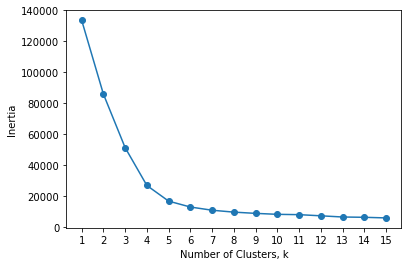

In [35]:
# Creating a range of 15 clusters to use and an empty list of inertias to append to
ks = range(1, 16)
inertias = []

# Iterate through the range
for k in ks:
    # Create a KMeans instance with k clusters: model
    # Defining the number of clusters to use with k
    model = KMeans(n_clusters= k)
    
    # Fit model to samples
    model.fit(stock_array)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot nth clusters(ks) vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of Clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()


In [36]:
# Creating the Cluster model with 10 clusters
kmeans = KMeans(n_clusters= 10)

# Creating the Normalizer
norm = Normalizer()

# Establishing the pipeline to reduce risk of error (good practice is to use a pipeline but its not required).
pipeline = make_pipeline(norm, kmeans)


In [37]:
# Fitting the pipeline to the data
pipeline.fit(stock_array)

# Creating the predicted cluster lable that each company would be placed in.
cluster_label = pipeline.predict(stock_array)

# Creating a predicted df that aligns the companies to their respected cluster label.
pred_df = pd.DataFrame(
    {
        'Cluster Label' : cluster_label,
        'Company Name' : company_names
    }
)

# Organized in accending order of cluster label
pred_df = pred_df.sort_values('Cluster Label')

# Displaying what companies are placed together in each cluster. 
print(pred_df)

    Cluster Label                        Company Name
39              0                              Pfizer
51              1                   Texas instruments
50              1  Taiwan Semiconductor Manufacturing
35              2                            Navistar
57              2                               Exxon
53              2                       Valero Energy
44              2                        Schlumberger
10              2                      ConocoPhillips
12              2                             Chevron
24              3                               Intel
58              3                               Xerox
30              3                          MasterCard
31              3                           McDonalds
29              3                     Lookheed Martin
33              3                           Microsoft
23              3                                 IBM
36              3                    Northrop Grumman
47              3           

In [38]:
# Creating the crosstab
ct = pd.crosstab(pred_df['Cluster Label'], pred_df['Company Name'])

# Displaying ct
print(ct)

Company Name   3M  AIG  Amazon  American express  Apple  Bank of America  \
Cluster Label                                                              
0               0    0       0                 0      0                0   
1               0    0       0                 0      0                0   
2               0    0       0                 0      0                0   
3               1    0       0                 0      0                0   
4               0    0       0                 0      0                0   
5               0    0       0                 0      0                0   
6               0    1       0                 1      0                1   
7               0    0       1                 0      1                0   
8               0    0       0                 0      0                0   
9               0    0       0                 0      0                0   

Company Name   Boeing  British American Tobacco  Canon  Caterpillar  ...  \
Cluster Lab